In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-faces/Humans/1 (2916).jpg
/kaggle/input/human-faces/Humans/1 (607).jpg
/kaggle/input/human-faces/Humans/1 (3767).jpg
/kaggle/input/human-faces/Humans/1 (576).jpg
/kaggle/input/human-faces/Humans/1 (1856).jpg
/kaggle/input/human-faces/Humans/1 (1464).jpg
/kaggle/input/human-faces/Humans/1 (1290).jpg
/kaggle/input/human-faces/Humans/1 (1341).jpg
/kaggle/input/human-faces/Humans/1 (2598).jpg
/kaggle/input/human-faces/Humans/1 (789).jpg
/kaggle/input/human-faces/Humans/1 (882).jpg
/kaggle/input/human-faces/Humans/1 (5469).jpg
/kaggle/input/human-faces/Humans/1 (6466).jpg
/kaggle/input/human-faces/Humans/1 (6835).jpg
/kaggle/input/human-faces/Humans/1 (6027).jpg
/kaggle/input/human-faces/Humans/1 (4288).jpg
/kaggle/input/human-faces/Humans/1 (550).jpg
/kaggle/input/human-faces/Humans/1 (509).jpg
/kaggle/input/human-faces/Humans/1 (2135).jpg
/kaggle/input/human-faces/Humans/1 (3690).jpg
/kaggle/input/human-faces/Humans/1 (3664).jpg
/kaggle/input/human-faces/Humans/1 (6160

In [1]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential
import keras
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array

In [3]:
path='C:/Users/user/Desktop/Age and Gender/super_resol_data/Humans'
def images_upload(path):
    images=[]
    for root,subfolders,files in os.walk(path):
        for file in tqdm(files):
            filename=root+os.sep+file
            if filename.endswith('jpg') or filename.endswith('png'):
                images.append(filename)
    return images
images=images_upload(path)

100%|█████████████████████████████████████████████████████████████████████████| 7219/7219 [00:00<00:00, 1809410.81it/s]


In [5]:
def convert_high_image_labels(images):
    high_labels=[]
 
    for i in tqdm(images):
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(256,256))
        res_i = res_i.astype('float32') / 255.0

        del i
        high_labels.append(img_to_array(res_i))
      
    return high_labels
high_labels = convert_high_image_labels(images)

100%|██████████████████████████████████████████████████████████████████████████████| 7123/7123 [02:27<00:00, 48.28it/s]


In [6]:
def convert_low_image_labels(images):
    low_labels=[]
 
    for i in tqdm(images):
      
        i = cv2.imread(i)
        i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
        res_i=cv2.resize(i,(64,64))
        res_i = res_i.astype('float32') / 255.0
        del i
    
        low_labels.append(img_to_array(res_i))
    return low_labels
low_labels = convert_low_image_labels(images)

100%|██████████████████████████████████████████████████████████████████████████████| 7123/7123 [01:57<00:00, 60.65it/s]


In [ ]:
low_labels[0].shape

In [7]:
low_size = 64
from keras import layers
def down(filters , kernel_low_size, apply_batch_normalization = True):
    downsample = tf.keras.models.Sequential()
    downsample.add(layers.Conv2D(filters,kernel_low_size,padding = 'same', strides = 2))
    if apply_batch_normalization:
        downsample.add(layers.BatchNormalization())
    downsample.add(keras.layers.LeakyReLU())
    return downsample


def up(filters, kernel_low_size, dropout = False):
    upsample = tf.keras.models.Sequential()
    upsample.add(layers.Conv2DTranspose(filters, kernel_low_size,padding = 'same', strides = 2))
    if dropout:
        upsample.dropout(0.2)
    upsample.add(keras.layers.LeakyReLU())
    return upsample

def model():
    inputs = layers.Input(shape= [low_size,low_size,3])
    print(inputs.shape)
    d1 = down(128,(3,3),False)(inputs)
    print(d1.shape)
    d2 = down(128,(3,3),False)(d1)
    print(d2.shape)
    d3 = down(256,(3,3),True)(d2)
    print(d3.shape)
    d4 = down(512,(3,3),True)(d3)
    print(d4.shape)
    
    d5 = down(512,(3,3),True)(d4)
    print(d5.shape)
    #upsampling
    u1 = up(512,(3,3),False)(d5)
    print(u1.shape)
    u1 = layers.concatenate([u1,d4])
    u2 = up(256,(3,3),False)(u1)
    print(u2.shape)
    u2 = layers.concatenate([u2,d3])
    u3 = up(128,(3,3),False)(u2)
    print(u3.shape)
    u3 = layers.concatenate([u3,d2])
    u4 = up(128,(3,3),False)(u3)
    u4 = layers.concatenate([u4,d1])
    u5 = up(3,(3,3),False)(u4)
    u6 = up(3,(3,3),False)(u5)
    u7 = up(3,(3,3),False)(u6)
    output = layers.Conv2D(3,(2,2),strides = 1, padding = 'same')(u7)
    return tf.keras.Model(inputs=inputs, outputs=output)

model = model()
model.summary()

(None, 64, 64, 3)
(None, 32, 32, 128)
(None, 16, 16, 128)
(None, 8, 8, 256)
(None, 4, 4, 512)
(None, 2, 2, 512)
(None, 4, 4, 512)
(None, 8, 8, 256)
(None, 16, 16, 128)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 sequential (Sequential)        (None, 32, 32, 128)  3584        ['input_1[0][0]']                
                                                                                                  
 sequential_1 (Sequential)      (None, 16, 16, 128)  147584      ['sequential[0][0]']             
                                                                                                  
 sequential_2 (Sequential

In [ ]:
len(high_labels)

In [11]:
SIZE =64
HSIZE = 256
train_high_image = high_labels[:6000]
train_low_image = low_labels[:6000]
train_high_image = np.reshape(train_high_image,(len(train_high_image),HSIZE,HSIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_labels[6000:]
validation_low_image = low_labels[6000:]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),HSIZE,HSIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


# test_high_image = high_labels[6500:]
# test_low_image = low_labels[6500:]
# test_high_image= np.reshape(test_high_image,(len(test_high_image),HSIZE,HSIZE,3))
# test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
# print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (6000, 256, 256, 3)
Shape of validation images: (1123, 256, 256, 3)


In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])
model.fit(train_low_image, train_high_image, epochs = 7, batch_size = 1,
          validation_data = (validation_low_image,validation_high_image))

Epoch 1/7
6000/6000 [==============================] - 421s 70ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 2/7
6000/6000 [==============================] - 422s 70ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 3/7
6000/6000 [==============================] - 421s 70ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 4/7
6000/6000 [==============================] - 418s 70ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 5/7
6000/6000 [==============================] - 429s 71ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 6/7
6000/6000 [==============================] - 427s 71ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726
Epoch 7/7
6000/6000 [==============================] - 420s 70ms/step - loss: nan - acc: 0.7883 - val_loss: nan - val_acc: 0.7726


In [13]:
model.save('super_resol.model')

INFO:tensorflow:Assets written to: super_resol.model\assets


INFO:tensorflow:Assets written to: super_resol.model\assets


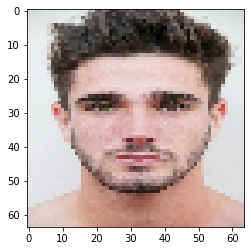

In [17]:
plt.imshow(low_labels[0])

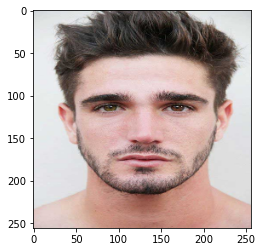

In [18]:
plt.imshow(high_labels[0])

In [ ]:
train_low_image[0].shape

In [19]:
x =  np.reshape(train_l_image[0],(1,SIZE,SIZE,3))
xx = model.predict(x)[0]

NameError: name 'train_l_image' is not defined

In [ ]:
xx=cv2.cvtColor(xx, cv2.COLOR_BGR2RGB)
ply

In [ ]:
t = np.reshape(train_high_image[0],(196608))

In [ ]:
import math
from collections import defaultdict
counts1 =defaultdict(lambda: 0)
for i in t:
    counts1[math.floor(i)] = counts1[math.floor(i)]+1

In [ ]:
plt.bar(range(len(counts1)), list(counts1.values()), align='center')
plt.xticks(range(len(counts1)), list(counts1.keys()))
plt.show()

In [ ]:
plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()))
plt.show()

1/1 [==============================] - 0s 25ms/step


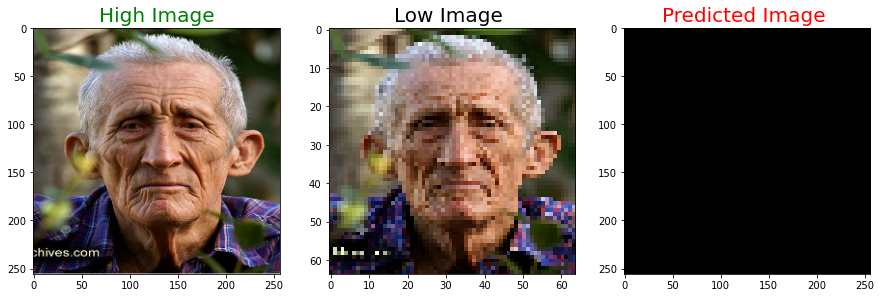

1/1 [==============================] - 0s 24ms/step


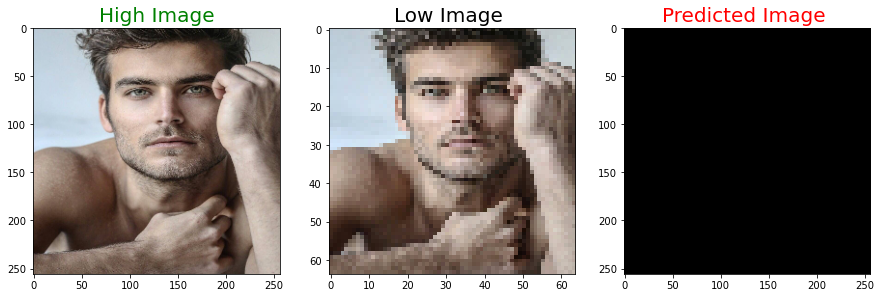

1/1 [==============================] - 0s 29ms/step


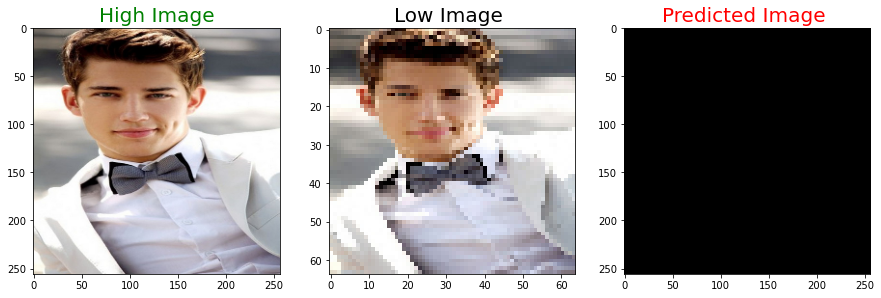

1/1 [==============================] - 0s 23ms/step


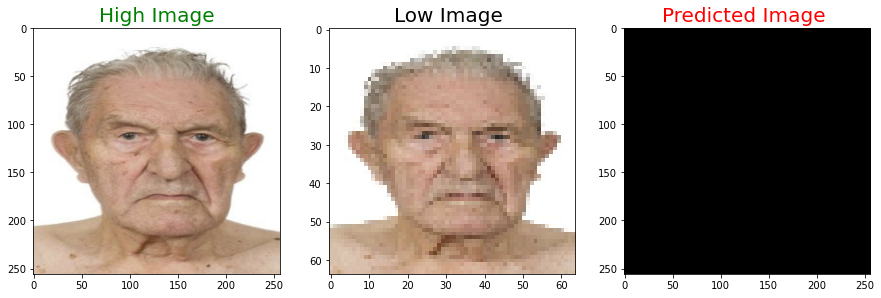

1/1 [==============================] - 0s 26ms/step


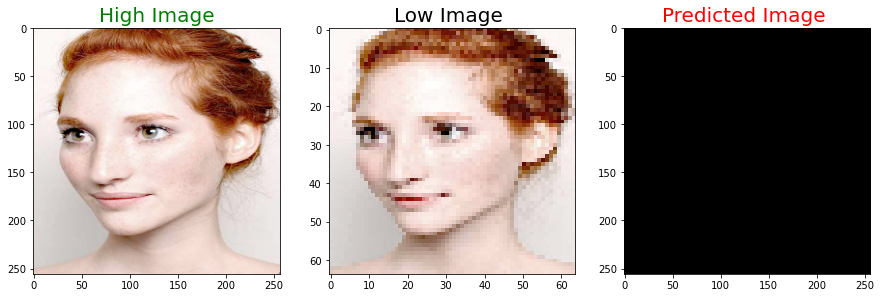

1/1 [==============================] - 0s 25ms/step


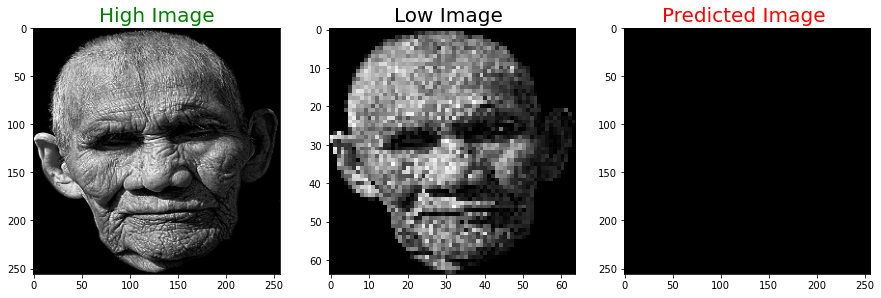

1/1 [==============================] - 0s 23ms/step


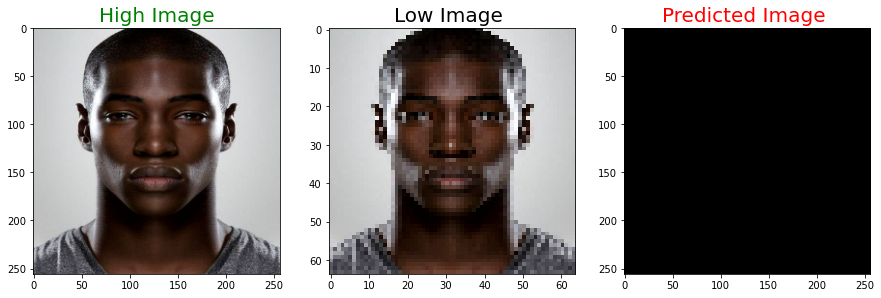

1/1 [==============================] - 0s 23ms/step


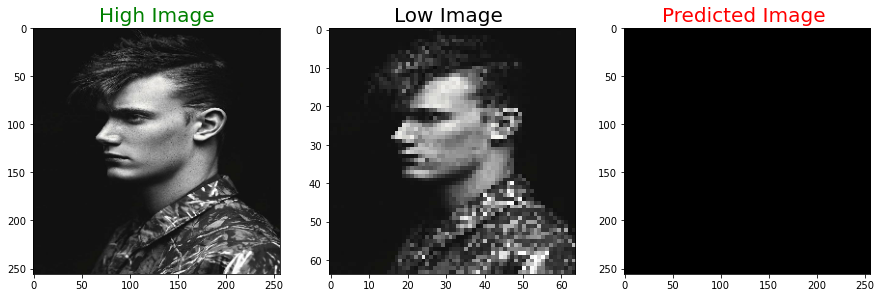

1/1 [==============================] - 0s 23ms/step


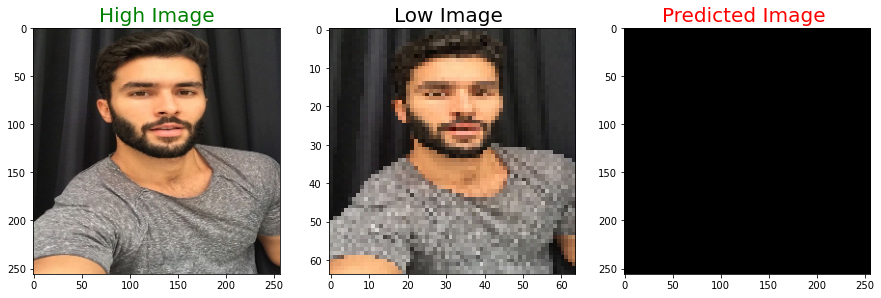

In [20]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted)
   
    plt.show()

for i in range(1,10):
    
    predicted = np.clip(model.predict(train_low_image[i].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
    plot_images(train_high_image[i],train_low_image[i],predicted)

In [15]:
!tar -zcvf outputname.tar.gz /kaggle/working

tar: Removing leading `/' from member names
/kaggle/working/
/kaggle/working/__notebook_source__.ipynb
/kaggle/working/.virtual_documents/
/kaggle/working/super_resol.model/
/kaggle/working/super_resol.model/assets/
/kaggle/working/super_resol.model/keras_metadata.pb
/kaggle/working/super_resol.model/variables/
/kaggle/working/super_resol.model/variables/variables.index
/kaggle/working/super_resol.model/variables/variables.data-00000-of-00001
/kaggle/working/super_resol.model/saved_model.pb
/kaggle/working/outputname.tar.gz
tar: /kaggle/working/outputname.tar.gz: file changed as we read it
tar: /kaggle/working: file changed as we read it


In [17]:
import shutil
shutil.make_archive("OUTPUT_NAME", 'zip', DIRECTORY_TO_ZIP)

NameError: name 'DIRECTORY_TO_ZIP' is not defined